In [20]:
from test_error_analytic_form import get_risk_predictors, get_E_tr_inv
from binary_search import binary_search
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
import matplotlib.patheffects as pe

import vlab
config = vlab.utils.load_yaml_file("config.yaml")

In [24]:
res_hash = config['results'][0]

import os
os.listdir(

In [15]:
colors = ['#D81B60', '#1E88E5']
def plot_trade_off_curve(gamma, alpha, **kwargs):
    E_te, E_tr, R = get_risk_predictors(gamma, alpha)
    k_crit = binary_search(R,0,n_steps=30, init=1.5, LB=1.0, UB= 2.0)
    Ks = np.logspace(np.log10(k_crit), 4, num=100)
    E_tr_inv = get_E_tr_inv(gamma,alpha)
    ks = np.array([E_tr_inv(tau) for tau in np.linspace(0.001,0.98,100)])
    # plt.scatter(df["rreg_E_tr"], df["rreg_E_te"],color = '#1f77b4',label='near-interpol-RR')
    
    
    plt.plot(E_tr(ks),E_te(ks),**kwargs)
    # ks = np.array([E_tr_inv(tau) for tau in np.linspace(0.001,0.98,20)])
    # plt.scatter(E_tr(ks),E_te(ks))


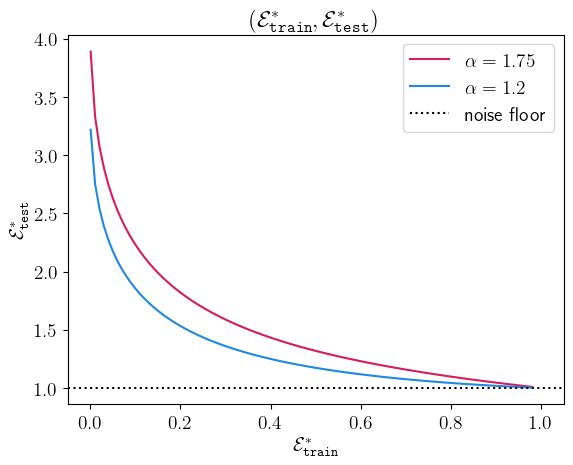

In [16]:

plot_trade_off_curve(gamma=2/3,alpha=2.5, label=r'$\alpha = 1.75$', color = colors[0])
plot_trade_off_curve(gamma=2/3,alpha=1.25, label=r'$\alpha = 1.2$', color = colors[1])
plt.axhline(y=1, color='k', linestyle=":", label='noise floor')
plt.xlim((-0.05,1.05))


plt.xlabel(r'$\mathcal{E}_{\mathtt{train}}^\ast$')
plt.ylabel(r'$\mathcal{E}_{\mathtt{test}}^\ast$')
plt.legend()
plt.title(r'$(\mathcal{E}_{\mathtt{train}}^\ast, \mathcal{E}_{\mathtt{test}}^\ast)$')

plt.savefig("outputs/trade_off_non_uniform.png",bbox_inches='tight')
# plt.savefig("output_figures/norm_with_NN.svg",bbox_inches='tight')
